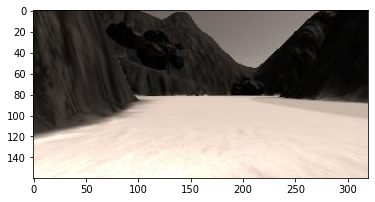

jpeg


In [2]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook

# Define the filename, read and plot the image
filename = 'sample.jpg'

image = mpimg.imread(filename)

plt.imshow(image)
plt.show()


import imghdr
print(imghdr.what('sample.jpg'))

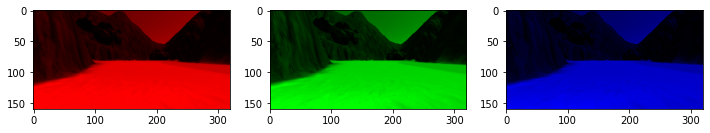

In [3]:
import numpy as np 

redChannel = np.copy(image)
redChannel[:, :, [1, 2]] = 0
greenChannel = np.copy(image)
greenChannel[:, :, [0, 2]] = 0
blueChannel = np.copy(image)
blueChannel[:, :, [0, 1]] = 0

fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131)
plt.imshow(redChannel)
plt.subplot(132)
plt.imshow(greenChannel)
plt.subplot(133)
plt.imshow(blueChannel)


In [4]:
def colorThreshold(img, red_th, gre_th, blu_th):
    
    red = img[:,:,[0]]
    gre = img[:,:,[1]]
    blu = img[:,:,[2]]
    
    red_low_values_flags = red < red_th
    red_high_values_flags = red >= red_th

    gre_low_values_flags = gre < gre_th
    gre_high_values_flags = gre >= gre_th

    blu_low_values_flags = blu < blu_th
    blu_high_values_flags = blu >= blu_th


    red[red_low_values_flags] = 0
    red[red_high_values_flags] = 255

    gre[gre_low_values_flags] = 0
    gre[gre_high_values_flags] = 255

    blu[blu_low_values_flags] = 0
    blu[blu_high_values_flags] = 255
    

    image_th = np.concatenate((red, gre, blu), axis = 2)

    plt.imshow(image_th)
    plt.show()
    
    return image_th
    

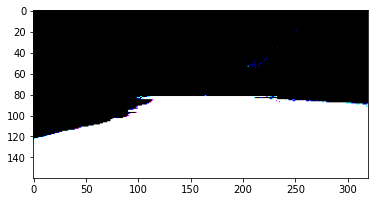

In [6]:
a = colorThreshold(image, 190, 174, 156)

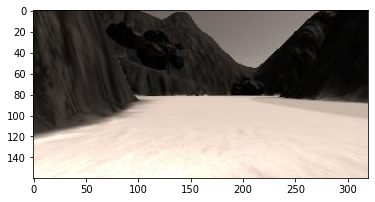

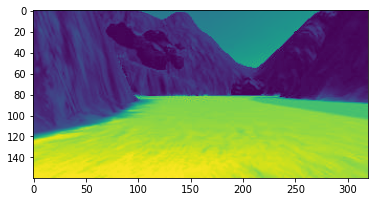

In [19]:

imageGrid = mpimg.imread('sample.jpg')
plt.imshow(imageGrid)
plt.show() 

gray_image = cv2.cvtColor(imageGrid, cv2.COLOR_BGR2GRAY ) 
plt.imshow(gray_image)
plt.show()

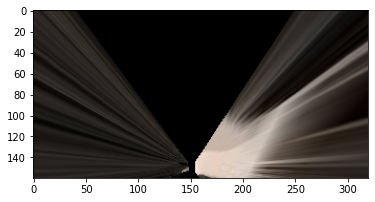

In [9]:
import numpy as np
import cv2


def transformImage(img, src, dst):
    transMatrix = cv2.getPerspectiveTransform(src, dst); '''Perspective Transformation Matrix'''
    warpedImage = cv2.warpPerspective( img, transMatrix, (img.shape[1], img.shape[0]) )
    return warpedImage

dst_size = 5
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6

sourcePoints = np.float32([[13.4819, 140.431], [118.643, 94.625], [199.288, 95.9153], [302.514, 141.077]])
#destinationPoints = np.float32([[13.4819, 140.431], [13, 95], [300, 95.9153], [302.514, 141.077]])

destinationPoints = np.float32([[imageGrid.shape[1]/2 - dst_size, imageGrid.shape[0] - bottom_offset],
                      [imageGrid.shape[1]/2 + dst_size, imageGrid.shape[0] - bottom_offset],
                      [imageGrid.shape[1]/2 + dst_size, imageGrid.shape[0] - 2*dst_size - bottom_offset], 
                      [imageGrid.shape[1]/2 - dst_size, imageGrid.shape[0] - 2*dst_size - bottom_offset],
                      ])

warpedImage = transformImage(imageGrid, sourcePoints, destinationPoints)
plt.imshow(warpedImage)
plt.show()



In [41]:
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all thre threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

In [55]:
'''colorsel = colorThreshold(warpedImage, 160, 160, 160)'''


print(imageGrid[:,:,0])

'''colorsel = color_thresh(imageGrid, rgb_thresh=(160, 160, 160))   fg = np.zeros_like(img[:,:,0])'''





[[ 45  35  27 ...   4   4   4]
 [ 41  36  28 ...   4   4   4]
 [ 35  36  31 ...   4   4   4]
 ...
 [253 253 253 ... 245 244 243]
 [252 252 252 ... 244 243 243]
 [252 252 252 ... 242 242 242]]


'colorsel = color_thresh(imageGrid, rgb_thresh=(160, 160, 160))   fg = np.zeros_like(img[:,:,0])'

In [36]:
arr1 = np.array([ [[1,0,0],[2,3,1]], [[1,0,0],[2,3,1]] ])

arr = np.array([[1,0],[1,1]])

print(arr1)
print(arr1.nonzero())

[[[1 0 0]
  [2 3 1]]

 [[1 0 0]
  [2 3 1]]]
(array([0, 0, 0, 0, 1, 1, 1, 1]), array([0, 1, 1, 1, 0, 1, 1, 1]), array([0, 0, 1, 2, 0, 0, 1, 2]))
